# One-Class SVM

- 주어진 데이터를 잘 설명할 수 있는 최적의 support vector를 구하고 이 영역 밖의 데이터들은 outlier로 간주하는 방식으로 이상치 탐지, 이미지 검색, 문서/ 텍스트 분류 등에 사용
- 알고리즘이 주어진 표본에 대해 올바른 경계를 설정할 수 있도록 알려진 "정상" 데이터 세트를 사용하여 모델을 만드는 것이 좋다. 
- 모델에 대한 매개변수(예: nu, gamma, kernel)는 결과에 상당히 영향을 미침. 그러므로 상황에 맞는 최적의 설정을 찾을 때까지 이러한 옵션을 실험해야 함.

<br>

# Load data 

In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('../data/creditcard.csv')

# 정상거래를 1, 사기거래를 -1로 변환
df.loc[df['Class'] == 1, "Class"] = -1
df.loc[df['Class'] == 0, "Class"] = 1

<br>

# Split data

In [2]:
X_nFraud = df.query("Class==1").drop(["Amount","Class","Time"],1)
y_nFraud = df.query("Class==1")["Class"]

X_Fraud = df.query("Class==-1").drop(["Amount","Class","Time"],1)
y_Fraud = df.query("Class==-1")["Class"]

#split data into training and cv set
X_train, X_test, y_train, y_test = train_test_split(X_nFraud, y_nFraud, test_size=0.2, random_state=42)

X_test = X_test.append(X_Fraud)
y_test = y_test.append(y_Fraud)

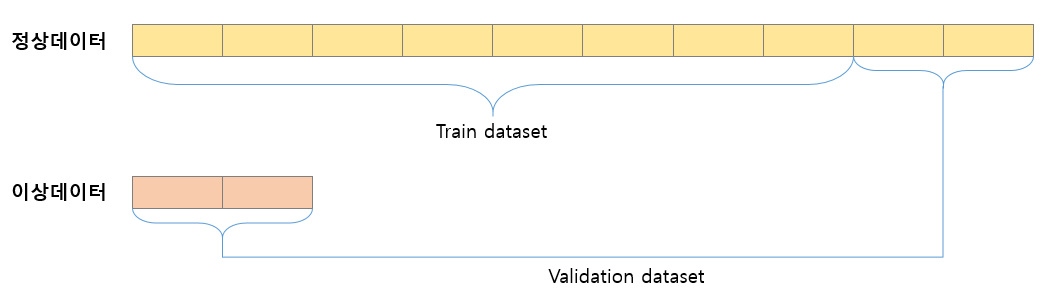

In [12]:
from IPython.display import Image
Image("ocsvm.png")

In [3]:
a = y_train.values.tolist()
Counter(a)

Counter({1: 227452})

In [4]:
b = y_test.values.tolist()
Counter(b)

Counter({1: 56863, -1: 492})

<br>

# One-Class SVM

In [5]:
model = svm.OneClassSVM(kernel='rbf', nu=0.0005,gamma=0.007)
model.fit(X_train)

OneClassSVM(gamma=0.007, nu=0.0005)

In [6]:
pred_testval = model.predict(X_test)

In [7]:
c = pred_testval.tolist()
Counter(c)

Counter({1: 56993, -1: 362})

In [8]:
print(classification_report(y_test, pred_testval))

              precision    recall  f1-score   support

          -1       0.77      0.57      0.66       492
           1       1.00      1.00      1.00     56863

    accuracy                           0.99     57355
   macro avg       0.88      0.78      0.83     57355
weighted avg       0.99      0.99      0.99     57355



In [9]:
roc = roc_auc_score(y_test, pred_testval)
print(f'ROC score is {roc}')

ROC score is 0.7838318142779057
